## Optimal transport between simple blobs

We'll generate some simple data and illustrate the gradient descent carried out by optimal transport.

In [172]:
import numpy as np
import torch
from sklearn.datasets import make_circles
from geomloss import SamplesLoss
import matplotlib.pyplot as plt

In [38]:
X,y = make_circles(200,noise=0.1,factor=0.2)

In [173]:
x0 = [v for idx, v in enumerate(X) if y[idx]==0]
x1 = [v for idx, v in enumerate(X) if y[idx]==1]

In [174]:
x0 = torch.tensor(x0,requires_grad=True)
x1 = torch.tensor(x1)

In [175]:
def display_helper(x,color,ax):
    x_ = x.detach().numpy()
    ax.scatter(x_[:, 0], x_[:, 1], c=color)

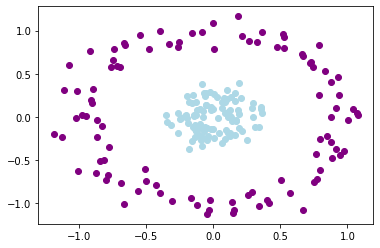

In [176]:
fig,ax=plt.subplots(1,1)
display_helper(x0,'purple',ax)
display_helper(x1,'lightblue',ax)

In [177]:
lr = 1
niter = 1000
loss = SamplesLoss(loss='sinkhorn',p=2,blur=0.05)

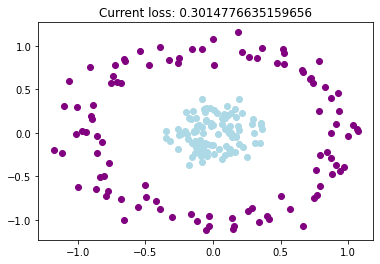

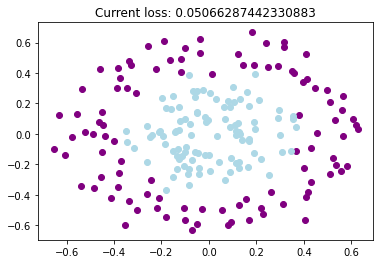

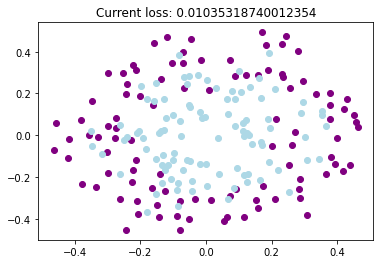

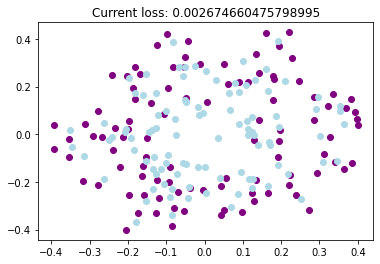

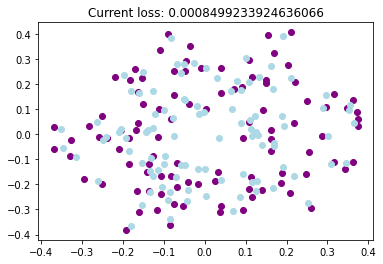

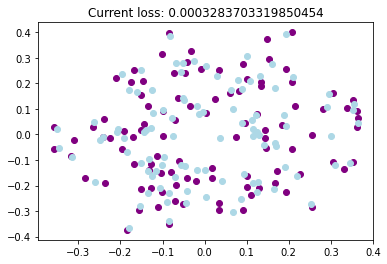

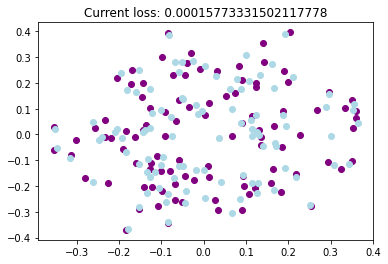

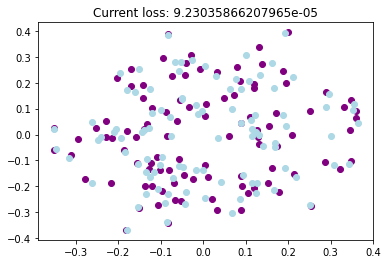

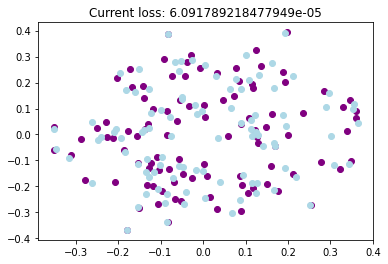

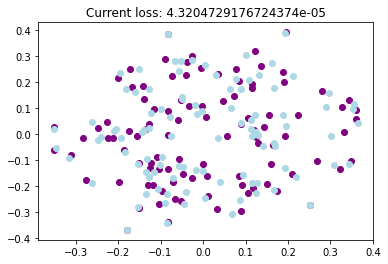

In [178]:
for i in range(niter):
    L = loss(x0,x1)
    [g] = torch.autograd.grad(L, [x0])
    x0.data -= lr*g
    
    if (i%100)==0:
        fig,ax=plt.subplots(1,1)
        display_helper(x0,'purple',ax)
        display_helper(x1,'lightblue',ax)
        ax.set_title(f"Current loss: {L.item()}")
        